In [32]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [33]:
def read_train_set():
    X_train_path = os.path.join("dataset", "X_train_data.csv")
    y_train_path = os.path.join("dataset", "y_train_data.csv")
    X_train = pd.read_csv(X_train_path)
    y_train = pd.read_csv(y_train_path)
    return X_train, y_train

X_train, y_train = read_train_set()

In [34]:
print(X_train.iloc[:])

       0    1    2    3    4    5    6    7    8    9  ...  29990  29991  \
0     75   69   76  180  196  191  173  186  169  140  ...     54     62   
1     63   76   94  153  142  140   92  134  133   80  ...     93     92   
2    100   98  100   94   74   74   75   75   58   19  ...     73     80   
3    111  103  102  102  102  102  104  118  142  126  ...    107    143   
4    134  144  106  156  164  112  116  176  143  168  ...     39     42   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
495   23   18   32   23   18   29   46   13   34   35  ...     13     10   
496   23   10   38  122  136  107   84   66   59   77  ...     94     93   
497  133  122  122  129  122  127  139  143  142  128  ...     65    102   
498  150  155  162  167  188  170  160  147   54   42  ...      7      5   
499   77   54   46   51   38   35   55   47   62   54  ...    152     76   

     29992  29993  29994  29995  29996  29997  29998  29999  
0       50     34     39 

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [36]:
X_train.shape, X_test.shape

((450, 30000), (50, 30000))

In [38]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, pd.Series.ravel(y_train))

LogisticRegression(max_iter=500)

In [40]:
from sklearn.metrics import accuracy_score

y_pred = log_reg.predict(X_test)
print(log_reg.__class__.__name__, accuracy_score(y_test, y_pred))
print(y_pred)

LogisticRegression 0.4
[4 3 3 3 3 3 3 4 3 3 3 3 3 3 3 1 2 2 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 1
 3 3 3 2 3 1 1 4 3 3 3 3 3]


In [41]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier()
rnd_clf.fit(X_train, pd.Series.ravel(y_train))

RandomForestClassifier()

In [42]:
y_pred = rnd_clf.predict(X_test)
print(rnd_clf.__class__.__name__, accuracy_score(y_test, y_pred))

RandomForestClassifier 0.58


In [43]:
from sklearn.svm import SVC

svc_clf = SVC(probability=True)
svc_clf.fit(X_train, pd.Series.ravel(y_train))

SVC(probability=True)

In [44]:
y_pred = svc_clf.predict(X_test)
print(svc_clf.__class__.__name__, accuracy_score(y_test, y_pred))

SVC 0.56


In [45]:
svc_clf.predict_proba(X_test), rnd_clf.predict_proba(X_test), log_reg.predict_proba(X_test)

(array([[0.06161622, 0.09396281, 0.08734818, 0.6401246 , 0.1169482 ],
        [0.065763  , 0.0617725 , 0.09984068, 0.6552322 , 0.11739162],
        [0.05016093, 0.05615211, 0.09353766, 0.68569192, 0.11445739],
        [0.07530163, 0.09751369, 0.10863061, 0.60509618, 0.11345789],
        [0.07034088, 0.09342068, 0.10373965, 0.62424973, 0.10824906],
        [0.0536784 , 0.12595151, 0.06859886, 0.64414685, 0.10762439],
        [0.04777057, 0.08999833, 0.07873336, 0.66971078, 0.11378696],
        [0.06400597, 0.12419584, 0.10288949, 0.59068646, 0.11822223],
        [0.03678016, 0.06576338, 0.11139635, 0.66090367, 0.12515644],
        [0.08129849, 0.110701  , 0.08929711, 0.6110691 , 0.1076343 ],
        [0.095477  , 0.1728254 , 0.10023694, 0.52449884, 0.10696183],
        [0.03644128, 0.11317613, 0.10351073, 0.62261039, 0.12426147],
        [0.06745348, 0.16068232, 0.07818431, 0.58437043, 0.10930945],
        [0.08426061, 0.11884141, 0.0805034 , 0.61257531, 0.10381927],
        [0.0518228 ,

In [46]:
y_train.value_counts()

30000
3        278
4         53
1         47
2         45
0         27
dtype: int64

In [47]:
y_test.value_counts()

30000
3        28
4         8
2         7
1         5
0         2
dtype: int64

Text(0.5, 0, '# of Training Examples')

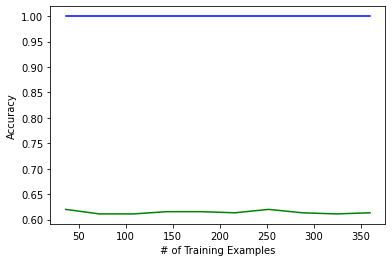

In [49]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(rnd_clf, X_train, pd.Series.ravel(y_train)
                                                       , train_sizes=np.linspace(0.1, 1, 10))
plt.figure()
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, "b-", label="Train")
plt.plot(train_sizes, val_scores_mean, "g-", label="CV")
plt.ylabel("Accuracy")
plt.xlabel("# of Training Examples")